>[Pseudoinverse: Moore Penrose](#scrollTo=LOdvoiqdUof7)

>>[Solve undetermined systems via pseudo inverse](#scrollTo=7-A3W728b40C)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pseudoinverse: Moore Penrose

If a matrix $A$ doesn't have inverse, we may define *pseudo inverse* $A^\dagger$ such that 
$$
  AA^\dagger \approx I
$$

From the SVD method, if $A=VDU$, then, we define:

$$
  A^\dagger = V^TD'U^T
$$

Were $D'$ is associated to $D$

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
A = np.array([
    [2, 3],
    [5, 7],
    [11, 13]
])

In [ ]:
U, D, V = np.linalg.svd(A)

print(U, '\n\n', D, '\n\n', U)

[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]] 

 [19.40321383  0.71783924] 

 [[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]


In [ ]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
D_pse

array([[0., 0., 0.],
       [0., 0., 0.]])

Now see the values that will be replaced into `D_pse`:

In [ ]:
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_pse)

[[0.05153785 0.         0.        ]
 [0.         1.39306957 0.        ]]


Now we can compute de pseudo inverse of $A$:

In [ ]:
A_pse = V.T.dot(D_pse).dot(U.T)
print(A_pse)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [ ]:
A_pse_numpy = np.linalg.pinv(A)
print(A_pse_numpy)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


Now see that the product $AA^\dagger$ is pretty near to the identity matrix **But it is not!!**.  Furthermore, the product $A^\daggerA$ is very different to the identity matrix.

In [ ]:
np.set_printoptions(suppress=False)

In [ ]:
print(A_pse.dot(A))

[[ 1.00000000e+00 -1.77635684e-15]
 [ 4.44089210e-16  1.00000000e+00]]


In [ ]:
A.dot(A_pse)

array([[ 0.25773196,  0.43298969, -0.06185567],
       [ 0.43298969,  0.74742268,  0.03608247],
       [-0.06185567,  0.03608247,  0.99484536]])

But the definition of the pseudo inverse is not via SVD decomposition. It is defined by:

$$
  A^\dagger = (A^TA)^{-1}A^T
$$

In [ ]:
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
print(A_pse_2)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


Summary

The Moore Penrose pseudo-inverse is used when in a system of linear equations represented by Ax = B, x has no inverse.
The pseudo inverse of MP is unique and exists if 4 conditions are verified.
To calculate it, the following steps are followed:
Calculate the matrices U, D, and V (SVD matrices) of A.
Construct D_pse: a matrix of zeros having equal dimension of A, which is then transposed.
Replace the submatrix D_pse[: D.shape[0], : D.shape[0]]] by np.linalg.inv(np.diag(D)).
Reconstruct pseudoinverse: A_pse = V.T.dot(D_pse).dot(U.T)
Notes

To calculate it automatically by Python: np.linalg.pinv(A)
What we get with A_pse is a matrix very close to the inverse. Close in the sense that it minimizes the norm two of these distances. That is, of these errors that we're making.
A_pse is not commutative, i.e. A_pse-A ≠ A-A_pse

## Solve undetermined systems via pseudo inverse



Let 

$$
  A\text{x} = \text{b}
$$

An undetermined linear system. We want to find $A^†$ such that

$$
  ||A^†b-x||_2
$$
is minimal.

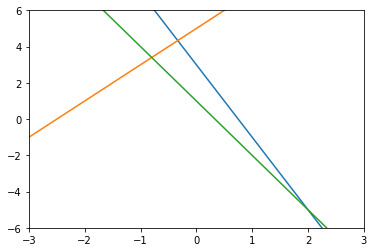

In [ ]:
x = np.linspace(-5, 5, 1000)

y_1 = -4*x+3
y_2 = 2*x+5
y_3 = -3*x+1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

Observe that here don't exist solution. Let's find an approximation via **pseudo inverse**:

In [ ]:
A = np.array([
    [4, 1],
    [-2, 1],
    [3, 1]
])
print(A)

[[ 4  1]
 [-2  1]
 [ 3  1]]


In [ ]:
A_pse = np.linalg.pinv(A)
print(A_pse)

[[ 0.11290323 -0.17741935  0.06451613]
 [ 0.14516129  0.62903226  0.22580645]]


In [ ]:
b = np.array([3, 5, 1])
print(b)

[3 5 1]


In [ ]:
approx = A_pse.dot(b)
print(approx)

[-0.48387097  3.80645161]


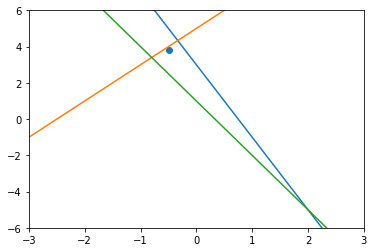

In [ ]:
x = np.linspace(-5, 5, 1000)

y_1 = -4*x+3
y_2 = 2*x+5
y_3 = -3*x+1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

#Approximation
plt.scatter(approx[0], approx[1])

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.show()

---
*Let’s change the world, Together!*


<img align=centerright src="https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F202df933-5432-47f6-aba6-a9a054cece4b%2Fpages-PhotoRoom.png?table=block&id=0b1ffffe-7be4-41f2-86dd-26cad410a64b&spaceId=12eea25e-0790-4a8f-aa1c-b60f93c02da2&width=250&userId=4be5c684-7292-494e-bbb2-2554f1af3879&cache=v2"  width="70" height="70">

<img align=centerright src="https://cdn-icons-png.flaticon.com/512/25/25231.png"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/61/61109.png?w=360"  width="70" height="70">
<img align=centerright src="https://cdn-icons-png.flaticon.com/512/39/39552.png"  width="70" height="70">
<img align=centerright src="https://cdn.freebiesupply.com/images/large/2x/instagram-icon-white-on-black.png"  width="100" height="70">

[Personal Blog](https://santiagoal.super.site/)      [GitHub](https://github.com/santiagoahl)    [LinkedIn](https://www.linkedin.com/in/santiago-ahumada-lozano/)   [Twitter](https://twitter.com/sahumadaloz)  [Instagram](https://www.instagram.com/santiago_al10/)
